## Ejercicio

c:\Users\joseg\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\joseg\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\joseg\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\joseg\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


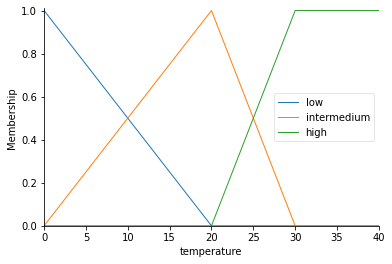

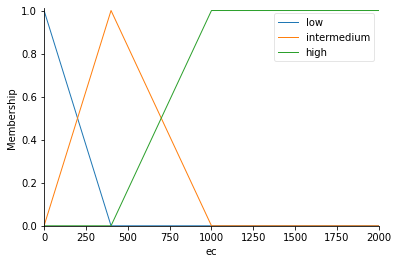

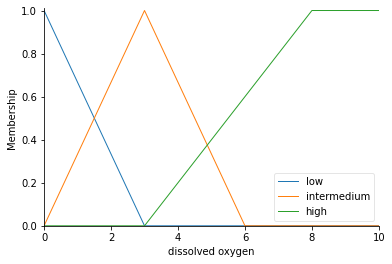

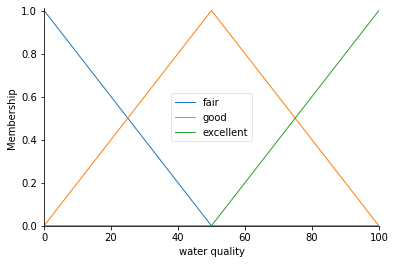

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline
import matplotlib.pyplot as plt

temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
ec = ctrl.Antecedent(np.arange(0, 2001, 1), 'ec')
oxygen = ctrl.Antecedent(np.arange(0, 11, 1), 'dissolved oxygen')
qualities = []
qualities.append(ctrl.Consequent(np.arange(0, 101, 1), 'water quality', defuzzify_method="centroid"))# centroid
qualities.append(ctrl.Consequent(np.arange(0, 101, 1), 'water quality', defuzzify_method="bisector"))# bisector
qualities.append(ctrl.Consequent(np.arange(0, 101, 1), 'water quality', defuzzify_method="mom"))# mom
qualities.append(ctrl.Consequent(np.arange(0, 101, 1), 'water quality', defuzzify_method="som"))# som
qualities.append(ctrl.Consequent(np.arange(0, 101, 1), 'water quality', defuzzify_method="lom"))# lom


temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['intermedium'] = fuzz.trimf(temperature.universe, [0, 20, 30])
temperature['high'] = fuzz.trapmf(temperature.universe, [20, 30, 40, 40])

ec['low'] = fuzz.trimf(ec.universe, [0, 0, 400])
ec['intermedium'] = fuzz.trimf(ec.universe, [0, 400, 1000])
ec['high'] = fuzz.trapmf(ec.universe, [400, 1000, 2000, 2000])

oxygen['low'] = fuzz.trimf(oxygen.universe, [0, 0, 3])
oxygen['intermedium'] = fuzz.trimf(oxygen.universe, [0, 3, 6])
oxygen['high'] = fuzz.trapmf(oxygen.universe, [3, 8, 10, 10])

for quality in qualities:
    quality['fair'] = fuzz.trimf(quality.universe, [0, 0, 50])
    quality['good'] = fuzz.trimf(quality.universe, [0, 50, 100])
    quality['excellent'] = fuzz.trapmf(quality.universe, [50, 100, 100, 100])

temperature.view()
ec.view()
oxygen.view()
q = qualities[0]
q.view()

Reglas Cambiar reglas para que funcionen en todos los casos

In [2]:
water_qualities = []

for quality in qualities:
    rule1 = ctrl.Rule(temperature['low'] & oxygen['high'] & ~ ec['high'], quality['excellent'])
    rule2 = ctrl.Rule(temperature['intermedium'] & ~ oxygen['high'], quality['good'])
    rule3 = ctrl.Rule(oxygen['intermedium'] & ~ temperature['low'], quality['good'])
    rule4 = ctrl.Rule(temperature['high'] & oxygen['low'] & ~ ec['high'], quality['fair'])

    water_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
    water_qualities.append(ctrl.ControlSystemSimulation(water_ctrl))

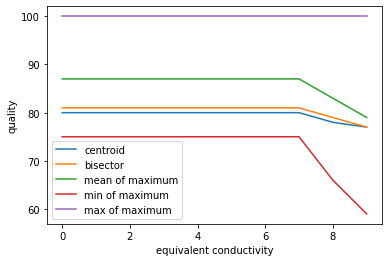

In [3]:

for water_quality in water_qualities:
    # ec
    c = []
    water_quality.input['temperature'] = 10
    water_quality.input['dissolved oxygen'] = 9

    counter = 0
    while counter < 1000:
        water_quality.input['ec'] = counter
        counter += 100
        water_quality.compute()
        c.append(int(water_quality.output['water quality']))        
    plt.plot(c)
plt.xlabel("equivalent conductivity")
plt.ylabel("quality")
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum', 'max of maximum']
plt.legend(labels)


Vemos que a una temperature de 25 y ec 8 fijos la calidad del agua será peor cuanto menor sea dissolved oxygen.

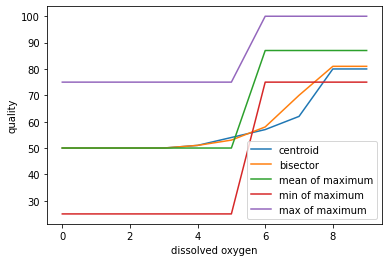

In [4]:
for water_quality in water_qualities:
    c = []
    water_quality.input['temperature'] = 10
    water_quality.input['ec'] = 9

    counter = 0
    while counter < 10:
        water_quality.input['dissolved oxygen'] = counter
        counter += 1
        water_quality.compute()
        c.append(int(water_quality.output['water quality']))        
    plt.plot(c)
plt.xlabel("dissolved oxygen")
plt.ylabel("quality")
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum', 'max of maximum']
plt.legend(labels)


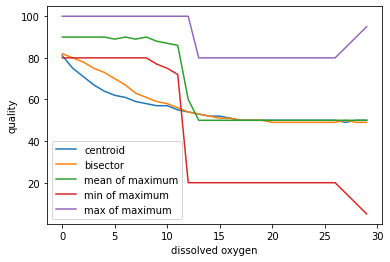

In [5]:
for water_quality in water_qualities:
    c = []
    water_quality.input['ec'] = 10
    water_quality.input['dissolved oxygen'] = 6

    counter = 0
    while counter < 30:
        water_quality.input['temperature'] = counter
        counter += 1
        water_quality.compute()
        c.append(int(water_quality.output['water quality']))        
    plt.plot(c)
    
plt.xlabel("dissolved oxygen")
plt.ylabel("quality")
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum', 'max of maximum']
plt.legend(labels)

water quality: 75%
water quality: 64%
water quality: 62%
water quality: 47%
water quality: 38%


c:\Users\joseg\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\joseg\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\joseg\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\joseg\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\joseg\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvari

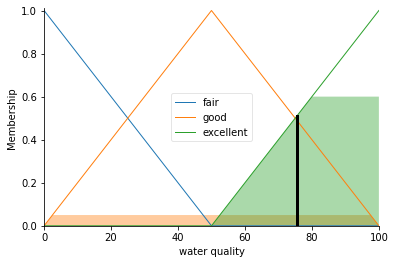

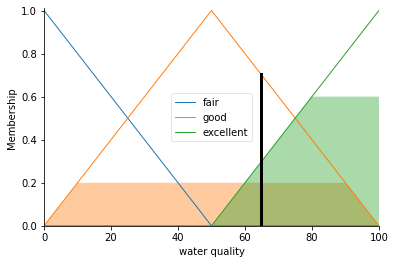

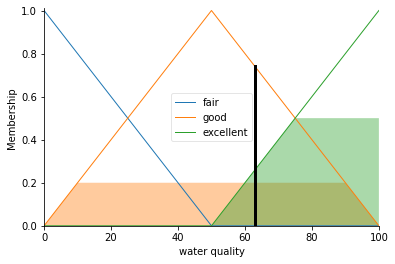

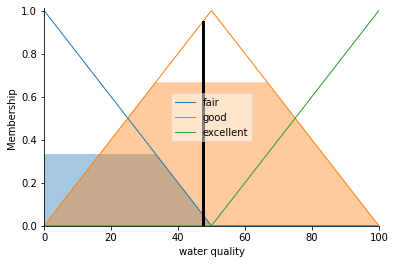

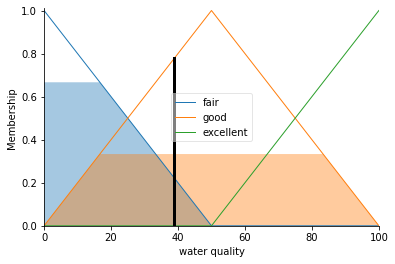

In [8]:
ecs = [10, 10, 10, 200, 200]
oxigens = [6, 6, 7, 2, 1]
temperatures = [1, 4, 10, 30, 35]
for vec, voxy, vtem in zip(ecs, oxigens, temperatures):
    water_qualities[0].input['ec'] = vec
    water_qualities[0].input['dissolved oxygen'] = voxy
    water_qualities[0].input['temperature'] = vtem
    water_qualities[0].compute()
    print("water quality: " + str(int(water_qualities[0].output['water quality'])) + "%")
    qualities[0].view(sim=water_qualities[0])